In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
dados = pd.read_csv("bicicletas.csv")

dados

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
dados["datas"] = pd.to_datetime(dados["datas"])

dados.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<AxesSubplot:xlabel='datas', ylabel='contagem'>

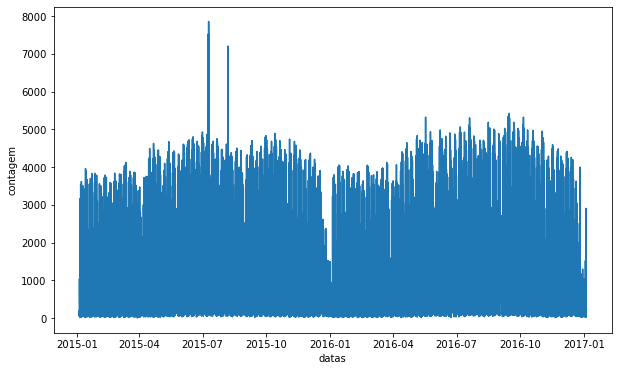

In [4]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dados, x="datas", y="contagem")

In [12]:
scaler = StandardScaler()
scaler.fit(dados["contagem"].values.reshape(-1,1))

y = scaler.transform(dados["contagem"].values.reshape(-1,1))

x = dados[["datas"]]

y

array([[-0.88574518],
       [-0.9262953 ],
       [-0.92998167],
       ...,
       [-0.74289816],
       [-0.84703824],
       [-0.92537371]])

In [23]:
tamanho_treino = int(len(dados)*0.9)
tamanho_teste = len(dados)-tamanho_treino

treino_x = x[:tamanho_treino]
teste_x = x[-tamanho_teste:]
treino_y = y[:tamanho_treino]
teste_y = y[-tamanho_teste:]

display(treino_y.shape)
display(teste_y.shape)

(15672, 1)

(1742, 1)

<AxesSubplot:xlabel='datas'>

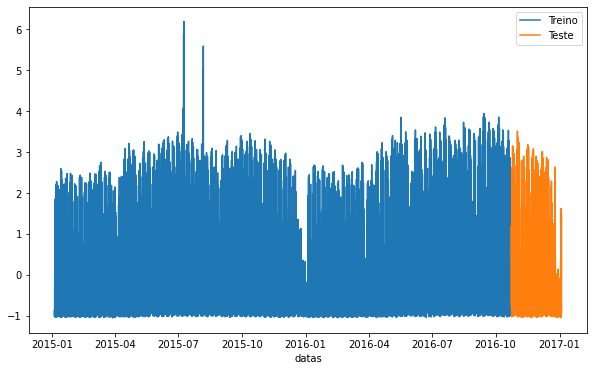

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x="datas", y=treino_y[:,0], data=dados[:tamanho_treino], label="Treino")
sns.lineplot(x="datas", y=teste_y[:,0], data=dados[-tamanho_teste:], label="Teste")